<a href="https://colab.research.google.com/github/ASHUTOSH-THAPA/Langgraph/blob/main/Simple_parallel_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install langgraph
!pip install langchain
%pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00


In [50]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [12]:
class Batsmanstate(TypedDict):
  balls:int
  runs:str
  sixes:str
  fours:str
  sr:float
  bpb:float
  boundary_percent:float
  summary:str

In [43]:
def cal_sr(state:Batsmanstate)->Batsmanstate:
  runs=state['runs']
  balls=state['balls']
  sr=(runs/balls)*100
  state['sr']=sr
  return {'sr':sr}
def cal_bp(state:Batsmanstate)->Batsmanstate:
  sixes=state['sixes']
  fours=state['fours']
  bpb=state['balls']/(sixes + fours)
  state['bpb']=bpb
  return {'bpb':bpb}
def cal_boundary_percent(state:Batsmanstate)->Batsmanstate:
  boundary_percent=((state['fours']*4) + (state['sixes']*6)/state['runs']) * 100
  state['boundary_percent']=boundary_percent
  return {'boundary_percent':boundary_percent}
def summary(state:Batsmanstate)->Batsmanstate:
  summary=f'''
  strike rate : {state['sr']}
  balls per boundry : {state['bpb']}
  boundary_percent : {state['boundary_percent']}

   '''
  state['summary']=summary
  return {'summary':summary}

In [44]:
graph=StateGraph(Batsmanstate)

In [45]:
graph.add_node('cal_sr',cal_sr)
graph.add_node('cal_bp',cal_bp)
graph.add_node('cal_boundary_percent',cal_boundary_percent)
graph.add_node('summary',summary)

In [46]:
graph.add_edge(START,'cal_sr')
graph.add_edge(START,'cal_bp')
graph.add_edge(START,'cal_boundary_percent')

graph.add_edge('cal_sr','summary')
graph.add_edge('cal_bp','summary')
graph.add_edge('cal_boundary_percent','summary')

graph.add_edge('summary',END)

In [47]:
workflow=graph.compile()

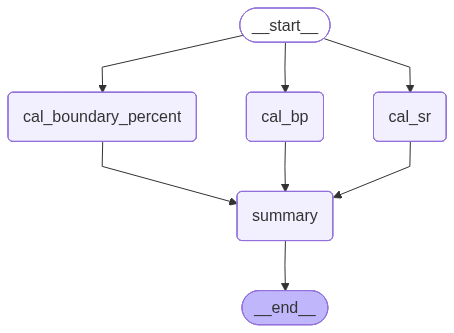

In [48]:
workflow

In [49]:
initial_state={
    'runs':100,
    'balls':25,
    'sixes':12,
    'fours':5
}
workflow.invoke(initial_state)

{'balls': 25,
 'runs': 100,
 'sixes': 12,
 'fours': 5,
 'sr': 400.0,
 'bpb': 1.4705882352941178,
 'boundary_percent': 2072.0,
 'summary': '\n  strike rate : 400.0\n  balls per boundry : 1.4705882352941178\n  boundary_percent : 2072.0\n  \n   '}